In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pickle as p
import os

In [2]:
le = LabelEncoder()

In [3]:
data_0 = pd.read_excel(r"C:\Users\DELL\Downloads\Customer_Churn_Data_Large_exel.xlsx",sheet_name = 0)
data_1 = pd.read_excel(r"C:\Users\DELL\Downloads\Customer_Churn_Data_Large_exel.xlsx",sheet_name = 1)
data_2 = pd.read_excel(r"C:\Users\DELL\Downloads\Customer_Churn_Data_Large_exel.xlsx",sheet_name = 2)
data_3 = pd.read_excel(r"C:\Users\DELL\Downloads\Customer_Churn_Data_Large_exel.xlsx",sheet_name = 3)
data_4 = pd.read_excel(r"C:\Users\DELL\Downloads\Customer_Churn_Data_Large_exel.xlsx",sheet_name = 4)

In [4]:
print(data_0.head())
print(data_1.head())
print(data_2.head())
print(data_3.head())
print(data_4.head())

   CustomerID  Age Gender MaritalStatus IncomeLevel
0           1   62      M        Single         Low
1           2   65      M       Married         Low
2           3   18      M        Single         Low
3           4   21      M       Widowed         Low
4           5   21      M      Divorced      Medium
   CustomerID  TransactionID TransactionDate  AmountSpent ProductCategory
0           1           7194      2022-03-27       416.50     Electronics
1           2           7250      2022-08-08        54.96        Clothing
2           2           9660      2022-07-25       197.50     Electronics
3           2           2998      2022-01-25       101.31       Furniture
4           2           1228      2022-07-24       397.37        Clothing
   CustomerID  InteractionID InteractionDate InteractionType ResolutionStatus
0           1           6363      2022-03-31         Inquiry         Resolved
1           2           3329      2022-03-17         Inquiry         Resolved
2         

**EDA**

Starting with Customer Demographics

In [5]:
data_0_4 = pd.merge(
    data_0,
    data_4,
    on = 'CustomerID',
    how = 'inner'
)

In [6]:
data_0_4.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus
0,1,62,M,Single,Low,0
1,2,65,M,Married,Low,1
2,3,18,M,Single,Low,0
3,4,21,M,Widowed,Low,0
4,5,21,M,Divorced,Medium,0


In [7]:
data_0_4.isnull().sum()

CustomerID       0
Age              0
Gender           0
MaritalStatus    0
IncomeLevel      0
ChurnStatus      0
dtype: int64

In [8]:
data_0_4['Gender'] = le.fit_transform(data_0_4['Gender'])
data_0_4['MaritalStatus'] = le.fit_transform(data_0_4['MaritalStatus'])
data_0_4['IncomeLevel'] = le.fit_transform(data_0_4['IncomeLevel'])

In [9]:
data_0_4.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus
0,1,62,1,2,1,0
1,2,65,1,1,1,1
2,3,18,1,2,1,0
3,4,21,1,3,1,0
4,5,21,1,0,2,0


In [10]:
data_0_4.describe()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.267000,0.487000,1.51900,0.977000,0.204000
std,288.819436,15.242311,0.500081,1.13971,0.821673,0.403171
min,1.000000,18.000000,0.000000,0.00000,0.000000,0.000000
25%,250.750000,30.000000,0.000000,1.00000,0.000000,0.000000
50%,500.500000,43.000000,0.000000,1.00000,1.000000,0.000000
75%,750.250000,56.000000,1.000000,3.00000,2.000000,0.000000
max,1000.000000,69.000000,1.000000,3.00000,2.000000,1.000000


<Axes: xlabel='Age', ylabel='Count'>

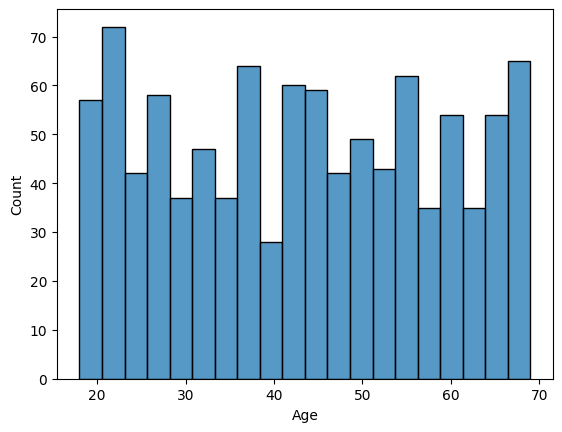

In [11]:
sns.histplot(data_0_4['Age'], bins=20)

<Axes: xlabel='IncomeLevel', ylabel='Age'>

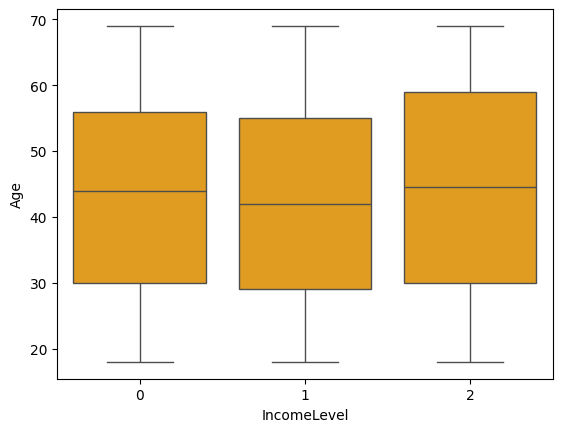

In [12]:
sns.boxplot(x=data_0_4['IncomeLevel'], y = data_0_4['Age'],color = 'orange')

<Axes: xlabel='ChurnStatus', ylabel='Age'>

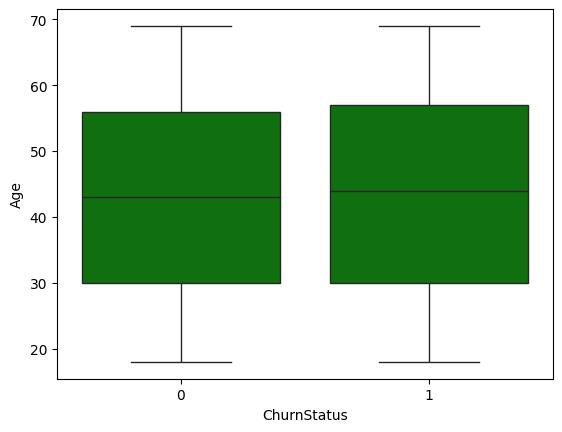

In [13]:
sns.boxplot(x='ChurnStatus', y='Age', data=data_0_4, color = 'green')

<Axes: xlabel='Gender', ylabel='count'>

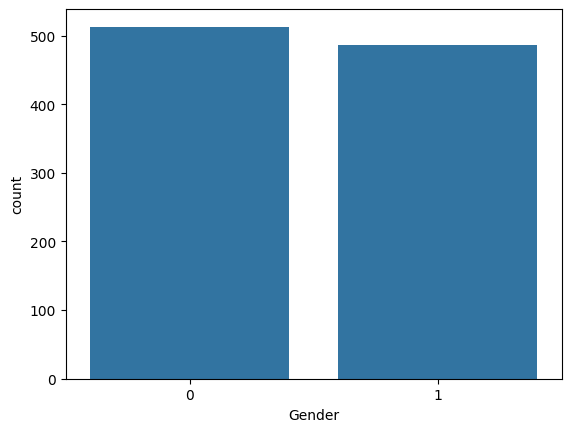

In [14]:
sns.countplot(x='Gender', data=data_0_4)

<Axes: xlabel='ChurnStatus', ylabel='count'>

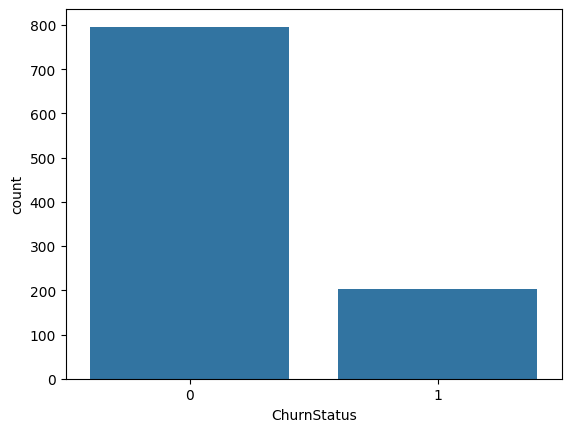

In [15]:
sns.countplot(x='ChurnStatus', data=data_0_4)

In [16]:
pd.crosstab(data_0_4['Gender'], data_0_4['ChurnStatus'])

ChurnStatus,0,1
Gender,,
0,412,101
1,384,103


In [17]:
pd.crosstab(data_0_4['MaritalStatus'], data_0_4['ChurnStatus'])

ChurnStatus,0,1
MaritalStatus,,
0,202,46
1,201,60
2,171,44
3,222,54


Now Tranaction HIstory

In [18]:
data_1_4 = pd.merge(
    data_1,
    data_4,
    on = 'CustomerID',
    how = 'inner'
)

In [19]:
data_1_4.head()

,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory,ChurnStatus
0,1,7194,2022-03-27,416.50,Electronics,0
1,2,7250,2022-08-08,54.96,Clothing,1
2,2,9660,2022-07-25,197.50,Electronics,1
3,2,2998,2022-01-25,101.31,Furniture,1
4,2,1228,2022-07-24,397.37,Clothing,1


In [20]:
data_1_4 = data_1_4.drop(columns=['TransactionID','TransactionDate'],axis=1)

In [21]:
data_1_4['ProductCategory'] = le.fit_transform(data_1_4['ProductCategory'])

In [22]:
data_1_4.head()

,CustomerID,AmountSpent,ProductCategory,ChurnStatus
0,1,416.50,2,0
1,2,54.96,1,1
2,2,197.50,2,1
3,2,101.31,3,1
4,2,397.37,1,1


In [23]:
data_1_4.columns

Index(['CustomerID', 'AmountSpent', 'ProductCategory', 'ChurnStatus'], dtype='object')

In [24]:
data_1_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       5054 non-null   int64  
 1   AmountSpent      5054 non-null   float64
 2   ProductCategory  5054 non-null   int32  
 3   ChurnStatus      5054 non-null   int64  
dtypes: float64(1), int32(1), int64(2)
memory usage: 138.3 KB


In [25]:
data_1_4.isnull().sum()

CustomerID         0
AmountSpent        0
ProductCategory    0
ChurnStatus        0
dtype: int64

In [26]:
data_1_4['AmountSpent'].describe()

count    5054.000000
mean      250.707351
std       142.250838
min         5.180000
25%       127.105000
50%       250.525000
75%       373.412500
max       499.860000
Name: AmountSpent, dtype: float64

In [27]:
data_1_4['ProductCategory'].value_counts()

ProductCategory
0    1041
4    1020
2    1001
1    1000
3     992
Name: count, dtype: int64

<Axes: xlabel='AmountSpent', ylabel='Count'>

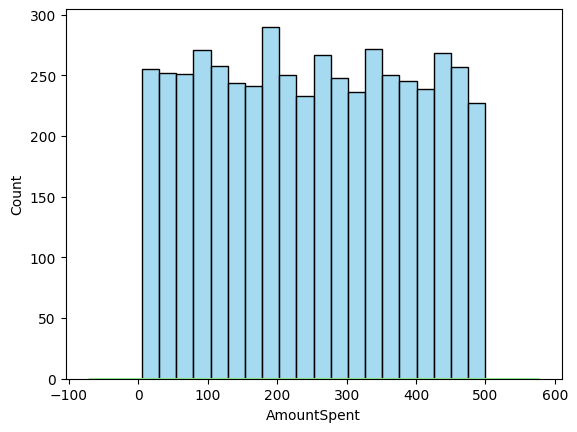

In [28]:
sns.histplot(data_1_4['AmountSpent'], bins=20, color='skyblue')
sns.kdeplot(data_1_4['AmountSpent'], fill=True, color='lightgreen')

<Axes: xlabel='ProductCategory', ylabel='count'>

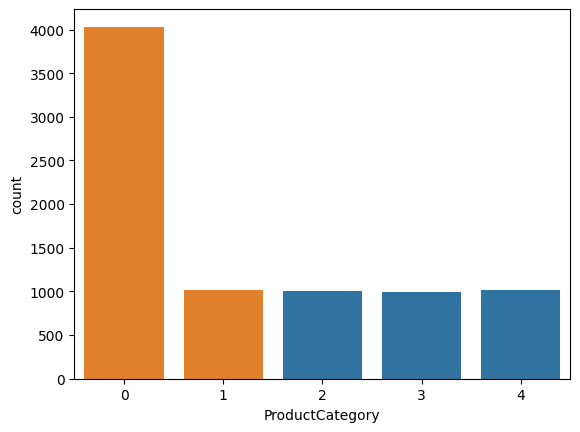

In [29]:
sns.countplot(x='ProductCategory', data=data_1_4)
sns.countplot(x='ChurnStatus', data=data_1_4)

In [30]:
pd.crosstab(data_1_4['ProductCategory'], data_1_4['ChurnStatus'])

ChurnStatus,0,1
ProductCategory,,
0,844,197
1,813,187
2,776,225
3,779,213
4,820,200


<Axes: xlabel='ChurnStatus', ylabel='AmountSpent'>

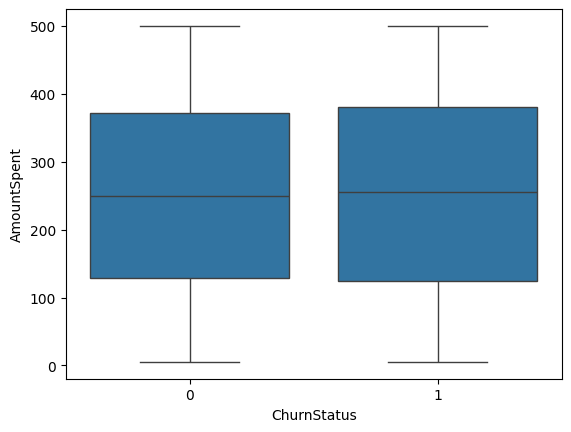

In [31]:
sns.boxplot(x='ChurnStatus', y='AmountSpent', data=data_1_4)

Now Customer Service

In [32]:
data_2_4 = pd.merge(
    data_2,
    data_4,
    on = 'CustomerID',
    how = 'inner'
)

In [33]:
data_2_4.head()

,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus,ChurnStatus
0,1,6363,2022-03-31,Inquiry,Resolved,0
1,2,3329,2022-03-17,Inquiry,Resolved,1
2,3,9976,2022-08-24,Inquiry,Resolved,0
3,4,7354,2022-11-18,Inquiry,Resolved,0
4,4,5393,2022-07-03,Inquiry,Unresolved,0


In [34]:
data_2_4 = data_2_4.drop(columns = ['InteractionID','InteractionDate'])

In [35]:
data_2_4['InteractionType'] = le.fit_transform(data_2_4['InteractionType'])
data_2_4['ResolutionStatus'] = le.fit_transform(data_2_4['ResolutionStatus'])

In [36]:
data_2_4.head()

,CustomerID,InteractionType,ResolutionStatus,ChurnStatus
0,1,2,0,0
1,2,2,0,1
2,3,2,0,0
3,4,2,0,0
4,4,2,1,0


In [37]:
data_2_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CustomerID        1002 non-null   int64
 1   InteractionType   1002 non-null   int32
 2   ResolutionStatus  1002 non-null   int32
 3   ChurnStatus       1002 non-null   int64
dtypes: int32(2), int64(2)
memory usage: 23.6 KB


In [38]:
data_2_4.isnull().sum()

CustomerID          0
InteractionType     0
ResolutionStatus    0
ChurnStatus         0
dtype: int64

In [39]:
print(data_2_4['InteractionType'].value_counts())
print(data_2_4['ResolutionStatus'].value_counts())
print(data_2_4['ChurnStatus'].value_counts())

InteractionType
1    360
0    335
2    307
Name: count, dtype: int64
ResolutionStatus
0    523
1    479
Name: count, dtype: int64
ChurnStatus
0    796
1    206
Name: count, dtype: int64


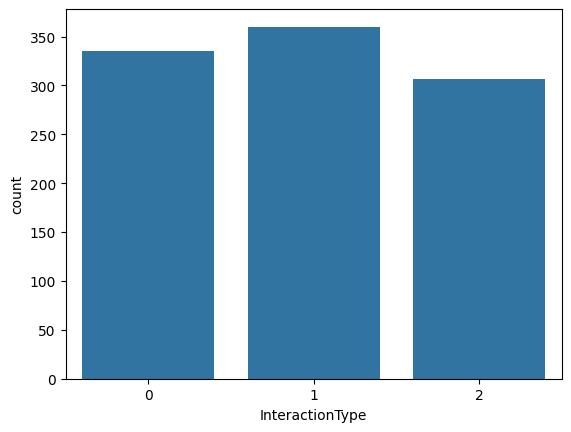

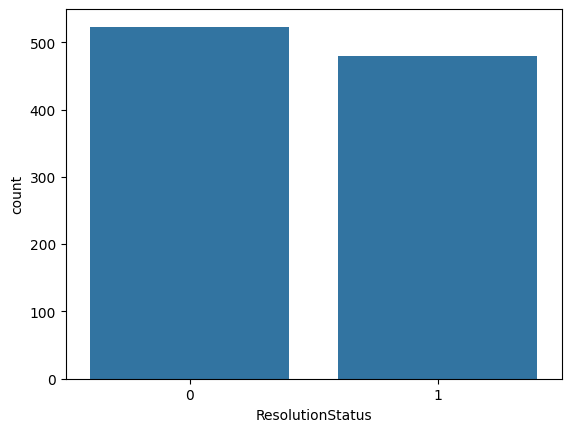

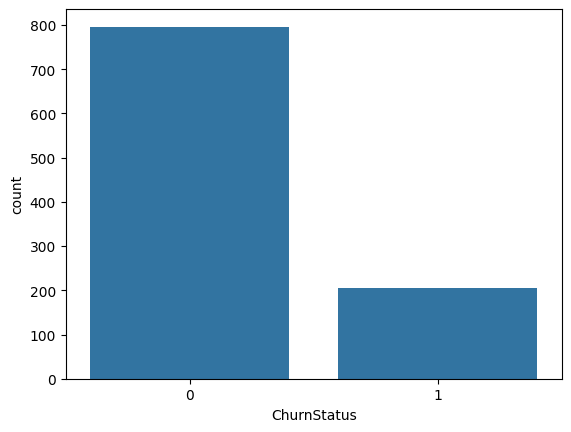

In [40]:
sns.countplot(x='InteractionType', data=data_2_4)
plt.show()

sns.countplot(x='ResolutionStatus', data=data_2_4)
plt.show()

sns.countplot(x='ChurnStatus', data=data_2_4)
plt.show()

In [41]:
print(pd.crosstab(data_2_4['InteractionType'], data_2_4['ChurnStatus']))
print('\n')
print(pd.crosstab(data_2_4['ResolutionStatus'], data_2_4['ChurnStatus']))

ChurnStatus        0   1
InteractionType         
0                263  72
1                284  76
2                249  58


ChurnStatus         0    1
ResolutionStatus          
0                 416  107
1                 380   99


<Axes: xlabel='ResolutionStatus'>

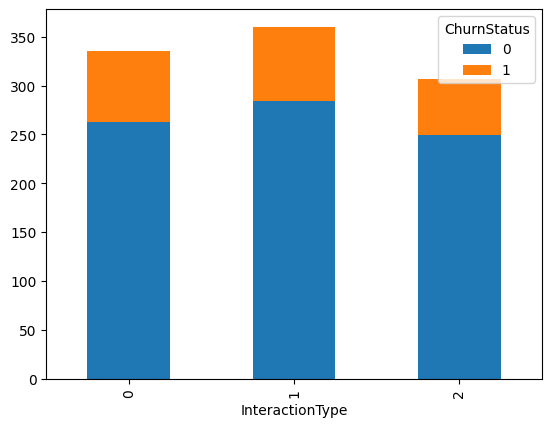

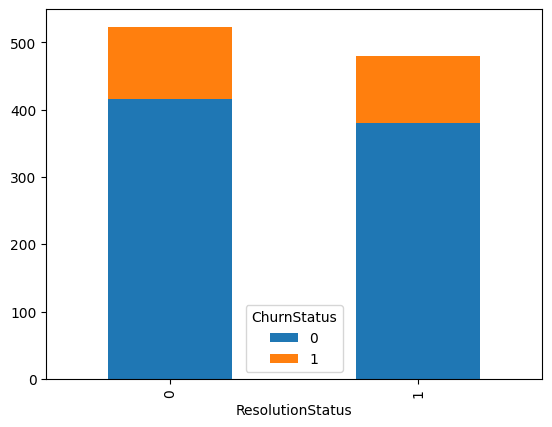

In [42]:
pd.crosstab(data_2_4['InteractionType'], data_2_4['ChurnStatus']).plot(kind='bar', stacked=True)
pd.crosstab(data_2_4['ResolutionStatus'], data_2_4['ChurnStatus']).plot(kind='bar', stacked=True)

<Axes: xlabel='ResolutionStatus', ylabel='InteractionType'>

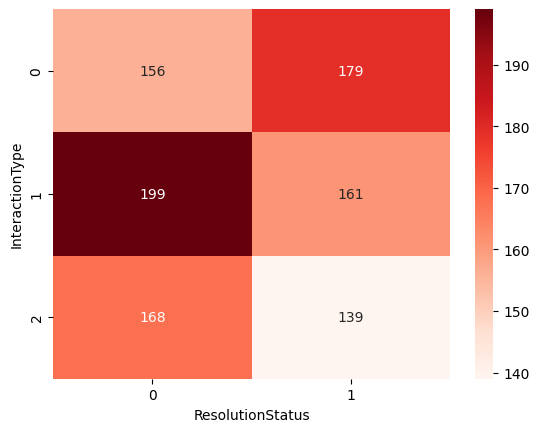

In [43]:
sns.heatmap(pd.crosstab(data_2_4['InteractionType'], data_2_4['ResolutionStatus']), annot=True, fmt='d', cmap='Reds')

In [44]:
churn_rate = data_2_4.groupby('InteractionType')['ChurnStatus'].value_counts(normalize=True).unstack()[1]
print(churn_rate)

InteractionType
0    0.214925
1    0.211111
2    0.188925
Name: 1, dtype: float64


Now Online Activity

In [45]:
data_3_4 = pd.merge(
    data_3,
    data_4,
    on = 'CustomerID',
    how = 'inner'
)

In [46]:
data_3_4.head()

,CustomerID,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,2023-10-21,34,Mobile App,0
1,2,2023-12-05,5,Website,1
2,3,2023-11-15,3,Website,0
3,4,2023-08-25,2,Website,0
4,5,2023-10-27,41,Website,0


In [47]:
data_3_4 = data_3_4.drop(columns=['LastLoginDate'])

In [48]:
data_3_4['ServiceUsage'] = le.fit_transform(data_3_4['ServiceUsage'])

In [49]:
data_3_4.head()

,CustomerID,LoginFrequency,ServiceUsage,ChurnStatus
0,1,34,0,0
1,2,5,2,1
2,3,3,2,0
3,4,2,2,0
4,5,41,2,0


In [50]:
data_3_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CustomerID      1000 non-null   int64
 1   LoginFrequency  1000 non-null   int64
 2   ServiceUsage    1000 non-null   int32
 3   ChurnStatus     1000 non-null   int64
dtypes: int32(1), int64(3)
memory usage: 27.5 KB


In [51]:
data_3_4.isnull().sum()

CustomerID        0
LoginFrequency    0
ServiceUsage      0
ChurnStatus       0
dtype: int64

In [52]:
data_3_4[['LoginFrequency', 'ServiceUsage']].describe()

,LoginFrequency,ServiceUsage
count,1000.000000,1000.000000
mean,25.912000,0.967000
std,14.055953,0.806574
min,1.000000,0.000000
25%,13.750000,0.000000
50%,27.000000,1.000000
75%,38.000000,2.000000
max,49.000000,2.000000


<Axes: xlabel='LoginFrequency', ylabel='Count'>

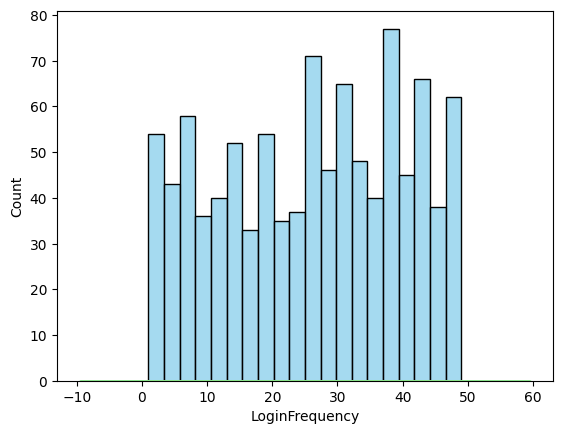

In [53]:
sns.histplot(data_3_4['LoginFrequency'], bins=20, color='skyblue')
sns.kdeplot(data_3_4['LoginFrequency'], fill=True, color='lightgreen')

<Axes: xlabel='ServiceUsage', ylabel='Count'>

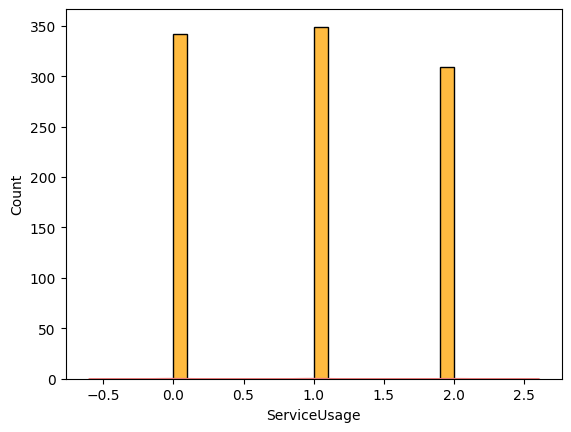

In [54]:
sns.histplot(data_3_4['ServiceUsage'], bins=20, color='orange')
sns.kdeplot(data_3_4['ServiceUsage'], fill=True, color='lightcoral')

<Axes: xlabel='ChurnStatus', ylabel='LoginFrequency'>

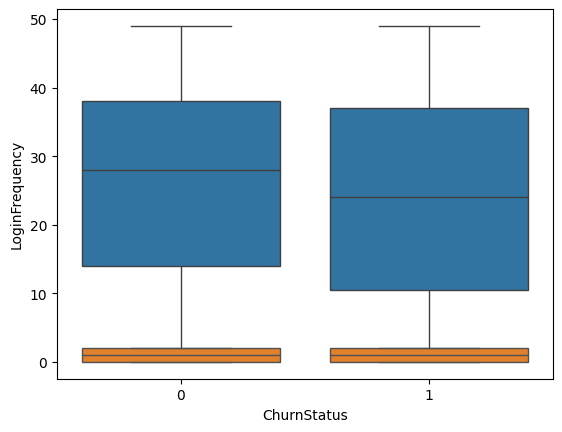

In [55]:
sns.boxplot(x='ChurnStatus', y='LoginFrequency', data=data_3_4)
sns.boxplot(x='ChurnStatus', y='ServiceUsage', data=data_3_4)

<Axes: xlabel='LoginFrequency', ylabel='ServiceUsage'>

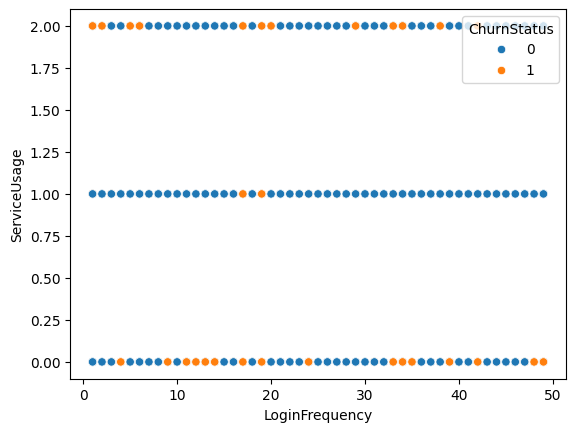

In [56]:
sns.scatterplot(x='LoginFrequency', y='ServiceUsage', hue='ChurnStatus', data=data_3_4)

<Axes: >

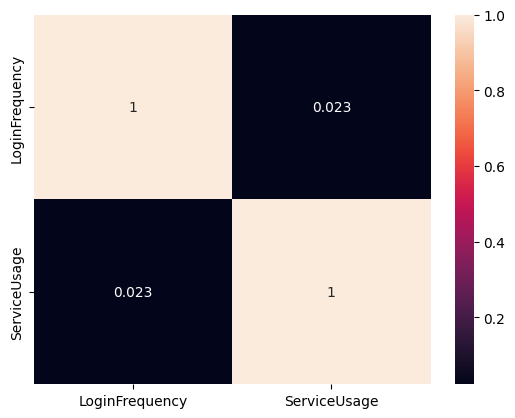

In [57]:
data_3_4[['LoginFrequency','ServiceUsage']].corr()
sns.heatmap(data_3_4[['LoginFrequency','ServiceUsage']].corr(), annot=True)

In [59]:
merged_data = data_0.merge(data_1, on='CustomerID', how='inner') \
                    .merge(data_2, on='CustomerID', how='inner') \
                    .merge(data_3, on='CustomerID', how='inner') \
                    .merge(data_4, on='CustomerID', how='inner')


In [61]:
merged_data.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1


In [63]:
merged_data.to_csv('merged_data.csv', index=False)

In [66]:
file_path = os.path.abspath('merged_data.csv')
print(file_path)

C:\Users\DELL\merged_data.csv
